In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

## Data preparation 

In [125]:
# Import data
path = os.getcwd()
data = pd.read_csv ('roc_sample_data.csv',header=[0]) 
df = pd.DataFrame(data)
y_pred = df.iloc[:,1] # predicted data
y_true = df.iloc[:,0] # actual data
df.head()

,actual,prediction
0,0,0.169426
1,0,0.488411
2,0,0.552130
3,0,0.464469
4,1,0.837950


In [126]:
ranked_df = df.sort_values(by=['prediction'], ascending=False)
ranked_df.reset_index(inplace=True)
ranked_df.drop(columns=["index"], axis=1, inplace=True)
ranked_df.head()

,actual,prediction
0,1,1.000000
1,1,0.985635
2,1,0.983855
3,1,0.979966
4,1,0.976538


## Confusion matrix 

In [123]:
FPR = []
TPR = []
prec=[]
acc=[]
F1score=[]

for i in range(len(ranked_df)):
    cm = np.zeros(4, dtype='int').reshape(2, 2)
    TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    threshold = ranked_df.iloc[i, 1]

    for k in range(len(ranked_df)):
        if ranked_df.iloc[k, 0]  == 1 and ranked_df.iloc[k, 1] >= threshold:
            TP = TP + 1
        elif ranked_df.iloc[k, 0] == 1 and ranked_df.iloc[k, 1] < threshold:
            FN = FN + 1
        elif ranked_df.iloc[k, 0] == 0 and ranked_df.iloc[k, 1] >= threshold:
            FP = FP + 1
        elif ranked_df.iloc[k, 0] == 0 and ranked_df.iloc[k, 1] < threshold:
            TN = TN + 1
            
    tpr = TP / (TP+FN) # sensitivity
    fpr = FP / (FP+TN)
    precision = TP / (TP+FP)
    accuracy = ((TP+TN)/(TP+TN+FP+FN))
    F1 = 2 * (precision * tpr) / (precision + tpr)

    FPR.append(fpr)
    TPR.append(tpr)
    prec.append(precision)
    acc.append(accuracy)
    F1score.append(F1)

#  

# Q1 - Plot ROC curve

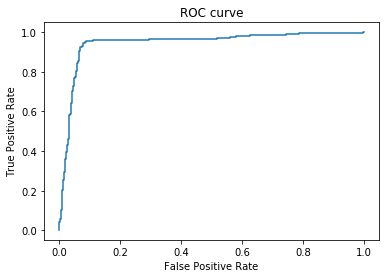

In [122]:
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(FPR,TPR)
plt.show()

# Q2 - AUC (area under ROC curve)

In [104]:
area=0
for i in range(1,len(FPR)):
    area = area + (TPR[i-1]+TPR[i]) * (FPR[i]-FPR[i-1]) / 2

print("AUC:\n",area)

AUC:
 0.944888472862262


# Q3 -  Simulate AUC by two observations with different labels

In [131]:
negative =  df["actual"]==0
positive =  df["actual"]==1
n=0
iteration = 1000

for i in range(iteration):
    x = df[negative].sample()
    y = df[positive].sample()
    
    if y.iloc[0,1] > x.iloc[0,1]:
        n+=1
        
print("Probability:",n/iteration)

Probability: 0.944


# Q4 - Optimization with thresholds

## (a) Sensitivity

In [113]:
ans=[]
for i in range(len(TPR)):
    if TPR[i] == max(TPR):
        ans.append([ranked_df.iloc[i,1],TPR[i]])
pd.DataFrame(ans,columns=['Threshold','Sensitivity'])

,Threshold,Sensitivity
0,0.036958,1.0
1,0.000000,1.0


## (b) Specificity

In [114]:
ans=[]
for i in range(len(FPR)):
    if FPR[i] == min(FPR): # max specificity = max (1-FPR) = min FPR
        ans.append([ranked_df.iloc[i,1],1-FPR[i]]) 
pd.DataFrame(ans,columns=['Threshold','Specificity'])

,Threshold,Specificity
0,1.000000,1.0
1,0.985635,1.0
2,0.983855,1.0
3,0.979966,1.0
4,0.976538,1.0
5,0.964807,1.0
6,0.941751,1.0
7,0.938464,1.0
8,0.936226,1.0
9,0.931180,1.0


## (c) Precision 

In [127]:
ans=[]
for i in range(len(prec)):
    if prec[i] == max(prec):
        ans.append([ranked_df.iloc[i,1],prec[i]])
pd.DataFrame(ans,columns=['Threshold','Precision'])

,Threshold,Precision
0,1.000000,1.0
1,0.985635,1.0
2,0.983855,1.0
3,0.979966,1.0
4,0.976538,1.0
5,0.964807,1.0
6,0.941751,1.0
7,0.938464,1.0
8,0.936226,1.0
9,0.931180,1.0


## (d) Accuracy 

In [116]:
ans=[]
for i in range(len(acc)):
    if acc[i] == max(acc):
        ans.append([ranked_df.iloc[i,1],acc[i]])
pd.DataFrame(ans,columns=['Threshold','Accuracy'])

,Threshold,Accuracy
0,0.695153,0.933
1,0.687645,0.933
2,0.676743,0.933


## (e) F1 Score

In [129]:
ans=[]
for i in range(len(F1score)):
    if F1score[i] == max(F1score):
        ans.append([ranked_df.iloc[i,1],F1score[i]])
pd.DataFrame(ans,columns=['Threshold','F1 Score'])

,Threshold,F1 Score
0,0.676743,0.933729
